# **Machine Learning Semester Project**


1.   Muhammad Abdullah Khalid (401168)
2.   Rana Muhammad Saad (400363)
3.   Asadullah Zafar (402646)



In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AveragePooling2D
from keras import regularizers

Importng the relevant file names

In [ ]:
import os
from os import listdir
filename = []
# get the path/directory
folder_dir = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/office_0003_out"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        filename.append(images)

In [ ]:
i = 0
# get the path/directory
folder_dir = "/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean"
for images in os.listdir(folder_dir):
  i = i+1
    # check if the image ends with png
  if (images.endswith(".png")):
      filename.append(images)
  if(i > 100):
    break

Importing the images

In [ ]:
images = np.array([])
for file in filename[101:200]:
  path = "/content/drive/MyDrive/ML_DATA/Project data/virtual11/office1-depth-clean/" + file
  image = cv2.imread(path)
  images = np.append(images, image[:, :, 1])
for file in filename[0:100]:
  path = "/content/drive/MyDrive/Copy of ML_DATA/Project data/nyu/office_0003_out/" + file
  image = cv2.imread(path)
  images = np.append(images, image[:, :, 1])

Shaping the Images to our desired size

In [ ]:
images = np.reshape(images, (199, 480, -1))

Adding the Labels in one-hot notation

In [ ]:
labels = np.zeros((199, 2))
labels[0:101] = [1, 0]
labels[101:200] = [0, 1]

Random Shuffling the Images

In [ ]:
def shuffle(a, b):
  x = np.random.permutation(199)
  return a[x], b[x]
images, labels = shuffle(images,labels)

Feature Normalization

In [ ]:
u = images.mean(0).reshape((1,)+images.shape[1:])
o = np.maximum(images.std(0).reshape((1,)+images.shape[1:]), 1e-10)
images = (images - u)/o

Creating the Convolutional Neural Network Model

In [ ]:
input_shape = (480, 640)
model = Sequential()
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(5, (20, 20), activation="relu"))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(loss="MSE", optimizer="adam", metrics=["acc"])
model.fit(images.reshape(-1, 480, 640, 1), labels, batch_size=16, epochs=8, validation_split=0.3)

In [ ]:
print(model.predict(images.reshape(-1, 480, 640, 1)))

7/7 [==============================] - 37s 5s/step
[[0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.         0.99999994]
 [0.57118136 0.42881855]
 [0.57118136 0.42881855]
 [0.         0.99999994]

In [ ]:
model_test = Sequential()
model_test.add(Conv2D(5, (20, 20), activation="relu", input_shape = (480, 640, 1)))
model_test.add(AveragePooling2D((2, 2)))
model_test.add(Conv2D(5, (20, 20), activation="relu"))
model_test.set_weights(model.get_weights()[0:4])

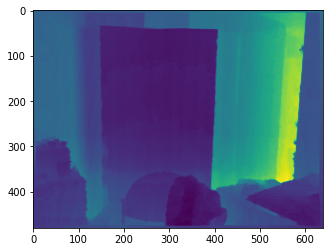

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5])

1/1 [==============================] - 0s 196ms/step


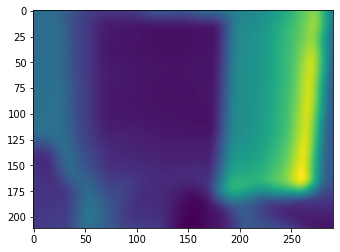

In [ ]:
import matplotlib.pyplot as plt
j = model_test.predict(images[5].reshape(1, 480, 640, 1))
plt.imshow(j[0,:, :, 1])

In [ ]:
model.save('Model')

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/Model')

In [ ]:
def RealOrFake(image):
  j = model.predict(image.reshape(1, 480, 640, 1))
  if(j[0,0] > j[0,1]):
    print('Fake Depth')
  else:
    print('Real Depth')

1/1 [==============================] - 0s 454ms/step
Real Depth


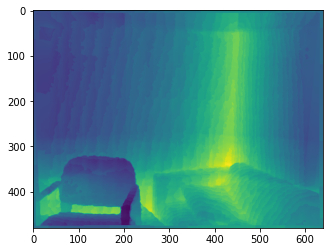

In [ ]:
import matplotlib.pyplot as plt
RealOrFake(images[6])
plt.imshow(images[6])